# Based on the Neural Network from scratch in Python

### by Omar Aflak

<b>Publshed on Towards Data Science</b>

https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65

I did a few changes and updates to explain the math more clearly and added a few more examples so you can see how this can be adapted to other problems.

John Wallin, MTSU

<b>
All the following text and code, unless otherwise noted, was published by Omar Aflak on the Blog "Towards Data Science" on November 14, 2018.  This is just a summary of this article.
</b>

### Layer by Layer
1. We feed input data into the neural network.

2. The data flows from layer to layer until we have the output.

3. Once we have the output, we can calculate the error which is a scalar.

4. Finally we can adjust a given parameter (weight or bias) by subtracting the derivative of the error with respect to the parameter itself.

5. We iterate through that process.

# Forward propogation

For a single layer -
X -> layer -> Y

For multiple layers

X -> layer 1 -> layer 2 -> layer 3 -> Y, E

Where E is a calculated error of the result Y.   Each layer has a set of weights.


# Back propagation
Once we have the error, we can calculate the deriviative it with respect to the weights and use it to backpropagate and update the weights.  This process continues to the first layer.

$w \leftarrow w - \alpha \frac{\partial E}{\partial w}$


The process of doing this involves finding derivatives of the error by looking at the partial derivatives.

$  \frac{\partial E}{\partial X} = \left[
\frac{\partial E}{\partial x_1}
\frac{\partial E}{\partial x_2}
\frac{\partial E}{\partial x_3}
\cdots
\frac{\partial E}{\partial x_i}
\right]
$

$  \frac{\partial E}{\partial Y} = \left[
\frac{\partial E}{\partial y_1}
\frac{\partial E}{\partial y_2}
\frac{\partial E}{\partial y_3}
\cdots
\frac{\partial E}{\partial y_j}
\right]
$

To find the error, we can use the chain rule:

$ \frac{\partial E}{\partial w} = \sum_j  
\frac{\partial E}{\partial y_j}
\frac{\partial y_j}{\partial w}
$

We can calculate the partial wrt x using the chain rule also

$ \frac{\partial E}{\partial x_i} = \sum_j  
\frac{\partial E}{\partial y_j}
\frac{\partial y_j}{\partial x_i}
$


Here are the steps:

1. Compute the partial of E wrt Y for the final layer and the output.

    $\frac{\partial E}{\partial Y} $

2. Compute the partial of Y wrt the weight of the final layer.

    $\frac{\partial Y}{w_i}$

3. Multiply them together to get the partial of the error wrt the weights of the final layer.

    $\frac{\partial E} {\partial w_i} = \frac{\partial Y}{w_i} \times \frac{\partial E}{\partial Y} $




# Code

The code for making this work is straightforward.  I will continue to use the work of the cited article including the code here.  I will be adding some comments to clarify what's going on, but the original article is very helpful.

In [ ]:
# Base class


import numpy as np


# This class defines the vary base methods for a single layer of the network.
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

# Forward propagation

The basic idea of forward propogation is to transform the inputs into outputs based on the weights.  For a single neuron, this is just simple algebra.

$ y_j = b_j + \sum_i x_i w_{ij}$

There $x_i$ is the input vector for the layer, $w_ij$ is the weight matrix, $b_j$ is the bias of the layer, and $y_j$ is the output vector for the layer.

We could also write this as a set of linear equations

$\left[\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_j \\
\end{array}
\right]
$
$=
\left[\begin{array}{ccccc}
w_{11} & w_{12} & w_{13} & \cdots & w_{1j} \\
w_{21} & w_{22} & w_{23} & \cdots & w_{2j} \\
w_{31} & w_{32} & w_{33} & \cdots & w_{3j} \\
\vdots & \vdots & \vdots & \vdots & \vdots  \\
w_{i1} & w_{i2} & w_{i3} & \cdots & w_{ij} \\
\end{array}
\right]
\left[\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_i \\
\end{array}
\right]
+
\left[\begin{array}{c}
b_1 \\
b_2 \\
b_3 \\
\vdots \\
b_j \\
\end{array}
\right]
$

Or.. without the explicit notation
$ Y = WX + B

# Backward propogation

The goal of backward propagation is to find the derivative of the error with respect to output of the layer -
$ \frac{\partial E}{\partial Y}.  This is moderately complicated, so let's go through the steps.  We are going to do this using partial derivatives.

We will be assumiing that we have a fully connected layer - in other words, there is a weight connecting every neuron to every input in the next layer.   There are no elements with missing weights.  



## Finding the deriviative of the errors with respect to the weights matrix

First, let's look at the form of the derivative of the output error with respect to the weights of the layer.  We need a single gradient for every weight in the layer.

$\frac{\partial E}{\partial W} =
\left[
\begin{array}{ccccc}
\frac{\partial E}{\partial w_{11} }&
    \frac{\partial E}{\partial w_{12}} &
    \frac{\partial E}{\partial w_{13}}  &
    \cdots &
    \frac{\partial E}{\partial w_{2j}} \\
\frac{\partial E}{\partial w_{12}} &
    \frac{\partial E}{\partial w_{22}} &
    \frac{\partial E}{\partial w_{23} } &
    \cdots &
    \frac{\partial E}{\partial w_{2j}} \\
\frac{\partial E}{\partial w_{31}} &
    \frac{\partial E}{\partial w_{32}} &
    \frac{\partial E}{\partial w_{33}}  &
    \cdots &
    \frac{\partial E}{\partial w_{3j} }\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\frac{\partial E}{\partial w_{i1}} &
    \frac{\partial E}{\partial w_{i2}} &
    \frac{\partial E}{\partial w_{i3}} &
    \cdots &
    \frac{\partial E}{\partial w_{ij}} \\   
\end{array}
\right]
$

Each of the components is formed using partial derivatives.

$ \frac{\partial E}{\partial w_{ij}} =
\frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial w_{ij}} +
\frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial w_{ij}} +
\frac{\partial E}{\partial y_3} \frac{\partial y_3}{\partial w_{ij}} +
\cdots
\frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial w_{ij}}
$

Here is the trick that makes all this work.

$ \frac{\partial y_j} {\partial w_{ij}} = x_i$

This is just because of the linear form we use for forward propogation - namely:

$ y_j = b_j + \sum_i x_i w_{ij}$

Using this, we can write a simpler version of the formula:
$ \frac{\partial E}{\partial w_{ij}} =
\frac{\partial E}{\partial y_j} x_i
$


This means we can simply our matrix:

$\frac{\partial E}{\partial W} =
\left[
\begin{array}{ccccc}
\frac{\partial E}{\partial y_1 } x_1 &
    \frac{\partial E}{\partial y_{2}} x_1 &
    \frac{\partial E}{\partial y_{3}} x_1 &
    \cdots &
    \frac{\partial E}{\partial y_{j}} x_1\\
\frac{\partial E}{\partial y_{1}} x_2 &
    \frac{\partial E}{\partial y_{2}} x_2&
    \frac{\partial E}{\partial y_{3}} x_2 &
    \cdots &
    \frac{\partial E}{\partial y_{j}} x_2\\
\frac{\partial E}{\partial y_{1}} x_3 &
    \frac{\partial E}{\partial y_{2}} x_3 &
    \frac{\partial E}{\partial y_{3}} x_3 &
    \cdots &
    \frac{\partial E}{\partial y_{j}} x_3\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
\frac{\partial E}{\partial y_{1}} x_i &
    \frac{\partial E}{\partial y_2} x_i &
    \frac{\partial E}{\partial y_{3}} x_i&
    \cdots &
    \frac{\partial E}{\partial w_{ij}} x_i\\   
\end{array}
\right]
$

Or just

$
\frac{\partial E}{\partial W} =
\left[\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_i \\
\end{array}
\right]
\left[
\begin{array}{ccccc}
\frac{\partial E}{\partial y_1 }  &
    \frac{\partial E}{\partial y_{2}}  &
    \frac{\partial E}{\partial y_{3}}  &
    \cdots &
    \frac{\partial E}{\partial y_{j}} \\
\end{array}
\right]
$

in vector form

$
\frac{\partial E}{\partial W} =
X^T \frac{\partial E}{\partial Y}
$

## Finding the derivative of the error with respect to the bias vector

We follow a similar procedure to update the Bias Vector.  As before, we need to find the how the error affects the bias.

$\frac{\partial E}{\partial B} =
\left[
\frac{\partial E}{\partial b_1} +
  \frac{\partial E}{\partial b_2} +
  \frac{\partial E}{\partial b_3} +
\cdots +
  \frac{\partial E}{\partial b_j}
  \right.
  $

  As before, we use the chain rule


  $ \frac{\partial E}{\partial b_j} =
  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial b_j} +
   \frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial b_j} +
    \frac{\partial E}{\partial y_3} \frac{\partial y_3}{\partial b_j} +
    \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial b_j}
    $


Going back to our summation function
$ y_j = b_j + \sum_i x_i w_{ij}$

We can see that
    
$\frac{\partial y_i}{\partial b_j} = \left\{
\begin{array}{l}
    1,  i=j \\
    0,  otherwise \\
\end{array} \right.
$

for all i, j.

This means we can simplfy our expression to:

 $ \frac{\partial E}{\partial b_j} =
     \frac{\partial E}{\partial y_j}
     $   

We can then conclude
$ \frac{\partial E}{\partial B} =
\left[
    \begin{array}{ccccc}
  \frac{\partial E}{\partial y_1}  &
   \frac{\partial E}{\partial y_2}  &
    \frac{\partial E}{\partial y_3}  &
    \cdots &
     \frac{\partial E}{\partial y_j}
    \end{array}
\right]
     $   

Or in vector notation
$ \frac{\partial E}{\partial B} =
 \frac{\partial E}{\partial Y} $

# Finding the deriviative of the error with respect to the input vector X

We still need to find one more thing - the deriviative of the error with respect to the input vector.

$  \frac{\partial E}{\partial X} =
\left[
    \begin{array}{ccccc}
  \frac{\partial E}{\partial x_1}  &
   \frac{\partial E}{\partial x_2}  &
    \frac{\partial E}{\partial x_3}  &
    \cdots &
     \frac{\partial E}{\partial x_j}
    \end{array}
\right]
     $   


Using the chain rule, we can get

$  \frac{\partial E}{\partial x_i} =
  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_i} +
   \frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial x_i} +
    \frac{\partial E}{\partial y_3} \frac{\partial y_3}{\partial x_i} +
    \cdots + \frac{\partial E}{\partial y_j} \frac{\partial y_j}{\partial x_i}
    $

Using our summation function
$ y_j = b_j + \sum_i x_i w_{ij}$

$\frac{\partial y_j}{\partial x_i} =
w_{ij}$


$ \frac{\partial E}{\partial x_i} =
  \frac{\partial E}{\partial y_1} w_{i1} +
   \frac{\partial E}{\partial y_2} w_{i2} +
    \frac{\partial E}{\partial y_3} w_{i3} +
    \cdots + \frac{\partial E}{\partial y_j} w_{ij}
    $

Setting up the derivative for the whole matrix

$  \frac{\partial E}{\partial X} =
\left[
    \begin{array}{ccc}
(  \frac{\partial E}{\partial y_1} w_{1j} +
   \frac{\partial E}{\partial y_2} w_{1j} +
    \cdots + \frac{\partial E}{\partial y_j} w_{1j})  & \cdots &
   ( \frac{\partial E}{\partial y_1} w_{ij} +
   \frac{\partial E}{\partial y_2} w_{ij} +
    \cdots + \frac{\partial E}{\partial y_j} w_{ij} )\\
    \end{array}
\right]
\left[
\begin{array}{cccc}
w_{11} & w_{12} &\cdots & w_{i1} \\
  w_{11} & w_{12} &\cdots & w_{i1} \\
  \vdots & \vdots & \vdots & \vdots \\
  w_{1j} & w_{1j} &\cdots & w_{ij} \\
  \end{array}
\right]
$

$  \frac{\partial E}{\partial X} =
\frac{\partial E}{\partial Y}
W^T
$

# The Elusive Punch Line

This leaves us with three relationships between the output error of a layer and the weights, the bias, and the input values.


$  \frac{\partial E}{\partial X} =
\frac{\partial E}{\partial Y}
W^T
$

$
\frac{\partial E}{\partial W} =
X^T \frac{\partial E}{\partial Y}
$

$ \frac{\partial E}{\partial B} =
 \frac{\partial E}{\partial Y} $

 We can put this into python to make it all work.


In [ ]:

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    # note - we are initializng our weights and biases to random values
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        # we will apply the output = weights * input + biases for the layer for forward propagation of the data
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)  # this is the first equation from above
        weights_error = np.dot(self.input.T, output_error)  # this is the second equation from above
        # dBias = output_error

        # update parameters
        # the learning rate is just a small number to allow us to numerically update the weights and biases.
        # It is roughly equivalent to saying  xnew = xold + old_velocity * delta_t
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

# Applying the equations

We are going to use the following basic ideas for the network

#### Forward propogation
Y = f(X)

Where F is the function WX + B

#### Back propagation
For backward propagation, we will use

$  \frac{\partial E}{\partial X} =
\left[
    \begin{array}{ccccc}
 \frac{\partial E}{\partial x_1} &
\frac{\partial E}{\partial x_2} &
\frac{\partial E}{\partial x_3} &
\cdots &
\frac{\partial E}{\partial x_i} \\
\end{array}
\right]
$


$  \frac{\partial E}{\partial X} =
\left[
    \begin{array}{ccccc}
  \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial x_1} &
   \frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial x_2} &
    \frac{\partial E}{\partial y_3} \frac{\partial y_3}{\partial x_3} &
    \cdots &
    \frac{\partial E}{\partial y_i} \frac{\partial y_i}{\partial x_i} \\
    \end{array}
    \right]
    $

We can find the second term in each elemnt by looking at the function

$f'(x_i) =  \frac{\partial y_i}{\partial x_i}$

$  \frac{\partial E}{\partial X} =
\left[
    \begin{array}{ccccc}
  \frac{\partial E}{\partial y_1} f'( x_1) &
   \frac{\partial E}{\partial y_2} f'( x_2) &
    \frac{\partial E}{\partial y_3} f'(  x_3) &
    \cdots &
    \frac{\partial E}{\partial y_i} f'(  x_i) \\
    \end{array}
    \right]
    $



$\frac{\partial E} {\partial X} = \frac{\partial E}{ \partial Y} \times f'(X)$

where this is an element by element multiplication.



# Activation layers

Between each layer, we need to clean up the signals to prevent the information from becoming garbage.  This is done by usng a function that ensures the range of the signal is between an upper and lower limit - typically between 0 and 1.   We also make sure the function has a rapid transition between states.  

A typical form for the activation function is something like hyperbolic tangent, since

$\lim_ {x \rightarrow \infty} \tanh( x)$ = 1

$\lim_{x \rightarrow -\infty} \tanh( x)$ = -1


The activation function also gives us a way to calculate the deriviatve of our network.  We use the deriviative of the activation function (activation_prime) below in our backpropagation.


In [ ]:


# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):   # we will define the activation function and the derivative here
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [ ]:

# activation function and its derivative
def tanh(x):
    return np.tanh(x);

def tanh_prime(x):
    return 1-np.tanh(x)**2;

# The loss function

Now we need to define the loss function.  This is a way of estimating the error of the network's output.  We typically use things like mean squared error (MSE) to estimate this quantity.


In [ ]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2));

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

# The network class

This class will manage all the layers for forward and backward propagation.   

- The use function will define the losses.  
- The prediction function will forward propagation the inputs to the outputs for a given set of inputs.
- The train function will backpropagate the inputs to the outputs for a given set of inputs across all the layers.

In [ ]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)


        # training loop
        errorValues = []
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            errorValues.append(err)


            # we want about 20 outputs during training
            if i % (epochs / 20) == 0:
                print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return errorValues

# Example 1 - XOR gates

For the first example, we will train the nettwork on a small dataset.  This will be the inputs and outputs of an XOR gate.

$\begin{array}{c|c|c}
{\rm Input\ 1 } & {\rm Input\ 2} & {\rm Output} \\
\hline
0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0 \\
\end{array}
$

We are going to apply this over and over to train the network.



epoch 1/10000   error=0.257095
epoch 501/10000   error=0.233065
epoch 1001/10000   error=0.189109
epoch 1501/10000   error=0.126351
epoch 2001/10000   error=0.025457
epoch 2501/10000   error=0.007007
epoch 3001/10000   error=0.003374
epoch 3501/10000   error=0.002091
epoch 4001/10000   error=0.001474
epoch 4501/10000   error=0.001122
epoch 5001/10000   error=0.000898
epoch 5501/10000   error=0.000743
epoch 6001/10000   error=0.000632
epoch 6501/10000   error=0.000548
epoch 7001/10000   error=0.000482
epoch 7501/10000   error=0.000430
epoch 8001/10000   error=0.000387
epoch 8501/10000   error=0.000352
epoch 9001/10000   error=0.000322
epoch 9501/10000   error=0.000297
predicted output = [array([[0.00095026]]), array([[0.97680233]]), array([[0.97637528]]), array([[0.00122116]])]


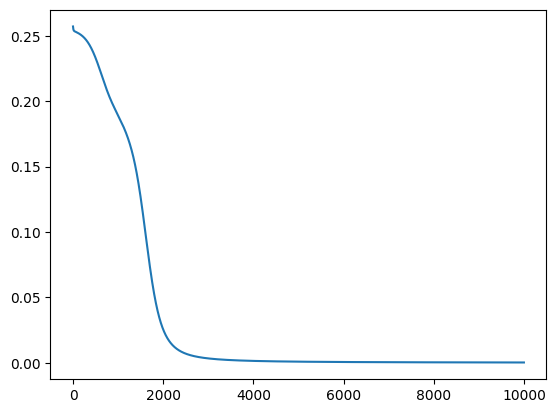

In [ ]:


# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])  # this is a list of inputs of the logical states for XOR
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])   # this is a list of outputs of the logical states for XOR

# network
#net = None  # clear the memory to make re-runs easier
net = Network()
net.add(FCLayer(2, 3))  # 2 inputs, 3 neurons
net.add(ActivationLayer(tanh, tanh_prime))

net.add(FCLayer(3, 1))  # 3 inputs from the previous layer, 1 neuron
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
error = net.fit(x_train, y_train, epochs=10000, learning_rate=0.01)

import matplotlib.pyplot as plt
plt.plot( list(range(len(error))), error)
# test
out = net.predict(x_train)

print("predicted output =", out)

### Analysis
Note the output array is very similar to the predictions for XOR.  Also, this network does not always converge.



# Example 2
Let's try a more complex dataset - a binary to BCD converter.  The idea is to take binary input and convert it into a decimal digit.  For this example, we will keep the number between 0 and 7.  

$\begin{array}{c|c|c|c}
{\rm Input\ 1 } & {\rm Input\ 2} & {\rm Input\ 3} & {\rm Output} \\
\hline
0 & 0 & 0   &  00000000 \\
0 & 0 & 1   &  00000010 \\
0 & 1 & 0   &  00000100  \\
0 & 1 & 1   &  00001000  \\
1 & 0 & 0   &  00010000  \\
1 & 0 & 1   &  00100000  \\
1 & 1 & 0   &  01000000  \\
1 & 1 & 1   &  10000000  \\
\end{array}
$


epoch 1/10000   error=0.226945
epoch 501/10000   error=0.048383
epoch 1001/10000   error=0.001298
epoch 1501/10000   error=0.000326
epoch 2001/10000   error=0.000180
epoch 2501/10000   error=0.000122
epoch 3001/10000   error=0.000092
epoch 3501/10000   error=0.000074
epoch 4001/10000   error=0.000062
epoch 4501/10000   error=0.000053
epoch 5001/10000   error=0.000046
epoch 5501/10000   error=0.000041
epoch 6001/10000   error=0.000037
epoch 6501/10000   error=0.000033
epoch 7001/10000   error=0.000030
epoch 7501/10000   error=0.000028
epoch 8001/10000   error=0.000026
epoch 8501/10000   error=0.000024
epoch 9001/10000   error=0.000023
epoch 9501/10000   error=0.000021
0 0 0  |  -0.00  +0.00  +0.00  +0.00  -0.00  +0.00  +0.00  +0.99  
0 0 1  |  +0.00  -0.00  +0.00  -0.00  +0.00  -0.00  +0.99  +0.00  
0 1 0  |  +0.00  +0.00  -0.00  +0.00  +0.00  +0.99  -0.00  +0.00  
0 1 1  |  +0.00  -0.00  +0.00  -0.00  +0.99  +0.00  +0.00  -0.00  
1 0 0  |  +0.00  +0.00  +0.00  +0.99  -0.00  +0.00  -0.0

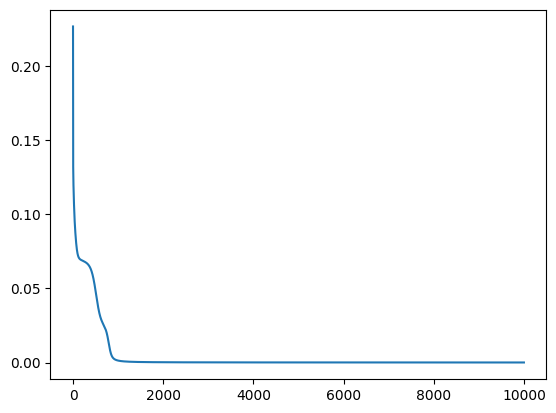

In [ ]:

# training data
x_train = np.array([[[0,0,0]], [[0,0,1]], [[0,1,0]], [[0,1,1]],
                    [[1,0,0]], [[1,0,1]], [[1,1,0]], [[1,1,1]]]   )  # this is a list of inputs of the binary states
y_train = np.array([
                    [[0,0,0,0,0,0,0,1]],
                    [[0,0,0,0,0,0,1,0]],
                    [[0,0,0,0,0,1,0,0]],
                    [[0,0,0,0,1,0,0,0]],
                    [[0,0,0,1,0,0,0,0]],
                    [[0,0,1,0,0,0,0,0]],
                    [[0,1,0,0,0,0,0,0]],
                    [[1,0,0,0,0,0,0,0]]
                    ])   # this is a list of outputs of the logical states for XOR

# network
#net = None  # clear the memory to make re-runs easier
net = Network()
net.add(FCLayer(3, 8))  # 2 inputs, 3 neurons
net.add(ActivationLayer(tanh, tanh_prime))

net.add(FCLayer(8, 8))  # 2 inputs, 3 neurons
net.add(ActivationLayer(tanh, tanh_prime))

net.add(FCLayer(8, 8))  # 3 inputs from the previous layer, 1 neuron
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
error = net.fit(x_train, y_train, epochs=10000, learning_rate=0.1)

import matplotlib.pyplot as plt
plt.plot( list(range(len(error))), error)
# test

out = net.predict(x_train)


for i in range(8):
    for j in range(3):
        x = x_train[i].flatten()[j]
        print("%d" % x, end=" ")
    print(" | ", end=" ")
    for j in range(8):
        x = out[i].flatten()[j]
        print("%+4.2f" % x, end="  ")
    print()


# Example 3 - breaking the binary to digit converter

We can break the network by not having enough weights involved.  Just like with any other model, we need to have enough free parameters to model the characteristics of the system.  This will fail because don't have enough parameters.

Notice the non-zero diagonal terms in the final matrix.


epoch 1/10000   error=0.206864
epoch 501/10000   error=0.054842
epoch 1001/10000   error=0.039474
epoch 1501/10000   error=0.038752
epoch 2001/10000   error=0.038314
epoch 2501/10000   error=0.038051
epoch 3001/10000   error=0.037893
epoch 3501/10000   error=0.037757
epoch 4001/10000   error=0.037610
epoch 4501/10000   error=0.037443
epoch 5001/10000   error=0.037244
epoch 5501/10000   error=0.036967
epoch 6001/10000   error=0.036558
epoch 6501/10000   error=0.036109
epoch 7001/10000   error=0.035713
epoch 7501/10000   error=0.035389
epoch 8001/10000   error=0.035131
epoch 8501/10000   error=0.034928
epoch 9001/10000   error=0.034765
epoch 9501/10000   error=0.034634
0 0 0  |  -0.06  +0.07  -0.07  +0.09  -0.02  +0.01  +0.50  +0.47  
0 0 1  |  +0.05  -0.08  +0.06  -0.05  +0.02  -0.01  +0.55  +0.49  
0 1 0  |  -0.00  +0.01  -0.00  -0.01  -0.00  +0.97  +0.00  +0.00  
0 1 1  |  -0.01  +0.02  +0.00  -0.01  +0.95  -0.00  +0.01  -0.01  
1 0 0  |  -0.07  +0.52  +0.06  +0.49  -0.04  -0.04  -0.0

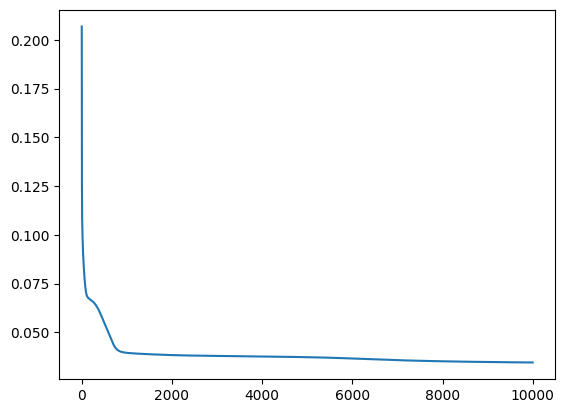

In [ ]:
# training data
x_train = np.array([[[0,0,0]], [[0,0,1]], [[0,1,0]], [[0,1,1]],
                    [[1,0,0]], [[1,0,1]], [[1,1,0]], [[1,1,1]]]   )  # this is a list of inputs of the binary states
y_train = np.array([
                    [[0,0,0,0,0,0,0,1]],
                    [[0,0,0,0,0,0,1,0]],
                    [[0,0,0,0,0,1,0,0]],
                    [[0,0,0,0,1,0,0,0]],
                    [[0,0,0,1,0,0,0,0]],
                    [[0,0,1,0,0,0,0,0]],
                    [[0,1,0,0,0,0,0,0]],
                    [[1,0,0,0,0,0,0,0]]
                    ])   # this is a list of outputs of the logical states for XOR

# network
#net = None  # clear the memory to make re-runs easier
net = Network()
net.add(FCLayer(3, 5))  # 3 inputs, 5 neurons
net.add(ActivationLayer(tanh, tanh_prime))

net.add(FCLayer(5, 8))  # 5 inputs, 8 neurons
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
error = net.fit(x_train, y_train, epochs=10000, learning_rate=0.1)

import matplotlib.pyplot as plt
plt.plot( list(range(len(error))), error)
# test

out = net.predict(x_train)


for i in range(8):
    for j in range(3):
        x = x_train[i].flatten()[j]
        print("%d" % x, end=" ")
    print(" | ", end=" ")
    for j in range(8):
        x = out[i].flatten()[j]
        print("%+4.2f" % x, end="  ")
    print()




In [ ]:
for i in range(8):
    for j in range(3):
        x = x_train[i].flatten()[j]
        print("%d" % x, end=" ")
    print(" | ", end=" ")
    for j in range(8):
        x = out[i].flatten()[j]
        print("%+4.2f" % x, end="  ")
    print()

print("          ", end="")
for j in range(8):
    #x = out[i].flatten()[j]
    print("-----" , end="  ")
print()
print("         ", end="")
for j in range(8):
    #x = out[i].flatten()[j]
    print("    %i" % j, end="  ")
print()

0 0 0  |  -0.06  +0.07  -0.07  +0.09  -0.02  +0.01  +0.50  +0.47  
0 0 1  |  +0.05  -0.08  +0.06  -0.05  +0.02  -0.01  +0.55  +0.49  
0 1 0  |  -0.00  +0.01  -0.00  -0.01  -0.00  +0.97  +0.00  +0.00  
0 1 1  |  -0.01  +0.02  +0.00  -0.01  +0.95  -0.00  +0.01  -0.01  
1 0 0  |  -0.07  +0.52  +0.06  +0.49  -0.04  -0.04  -0.02  +0.06  
1 0 1  |  -0.00  -0.00  +0.92  +0.01  -0.00  +0.00  +0.03  -0.03  
1 1 0  |  +0.07  +0.51  -0.04  +0.48  +0.04  +0.03  -0.06  +0.03  
1 1 1  |  +0.92  +0.04  +0.00  -0.03  -0.00  -0.00  +0.02  -0.03  
          -----  -----  -----  -----  -----  -----  -----  -----  
             0      1      2      3      4      5      6      7  
